In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [129]:
data=pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [130]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [131]:
for column in data.columns:
    print(column,data[column].unique())

Age [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Na_to_K [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.2

In [132]:
data['Sex']=data['Sex'].map({'F':0,'M':1})
data['Cholesterol']=data['Cholesterol'].map({'NORMAL':0,'HIGH':1})
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,1,25.355,drugY
1,47,1,LOW,1,13.093,drugC
2,47,1,LOW,1,10.114,drugC
3,28,0,NORMAL,1,7.798,drugX
4,61,0,LOW,1,18.043,drugY
...,...,...,...,...,...,...
195,56,0,LOW,1,11.567,drugC
196,16,1,LOW,1,12.006,drugC
197,52,1,NORMAL,1,9.894,drugX
198,23,1,NORMAL,0,14.020,drugX


In [133]:
encoded_data=pd.get_dummies(data,columns=['BP'],drop_first=True)
encoded_data

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL
0,23,0,1,25.355,drugY,False,False
1,47,1,1,13.093,drugC,True,False
2,47,1,1,10.114,drugC,True,False
3,28,0,1,7.798,drugX,False,True
4,61,0,1,18.043,drugY,True,False
...,...,...,...,...,...,...,...
195,56,0,1,11.567,drugC,True,False
196,16,1,1,12.006,drugC,True,False
197,52,1,1,9.894,drugX,False,True
198,23,1,0,14.020,drugX,False,True


In [134]:
features=[column for column in encoded_data.columns if column not in data.columns]
features

['BP_LOW', 'BP_NORMAL']

In [135]:
encoded_data[features]=encoded_data[features].astype(int)
encoded_data

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL
0,23,0,1,25.355,drugY,0,0
1,47,1,1,13.093,drugC,1,0
2,47,1,1,10.114,drugC,1,0
3,28,0,1,7.798,drugX,0,1
4,61,0,1,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,0,1,11.567,drugC,1,0
196,16,1,1,12.006,drugC,1,0
197,52,1,1,9.894,drugX,0,1
198,23,1,0,14.020,drugX,0,1


In [136]:
data=encoded_data

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   Cholesterol  200 non-null    int64  
 3   Na_to_K      200 non-null    float64
 4   Drug         200 non-null    object 
 5   BP_LOW       200 non-null    int32  
 6   BP_NORMAL    200 non-null    int32  
dtypes: float64(1), int32(2), int64(3), object(1)
memory usage: 9.5+ KB


In [138]:
X=data.drop(['Drug'],axis=1)
y=data[['Drug']]


In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()

In [140]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [141]:
treeclassifier=DecisionTreeClassifier()
param_grid={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']    
}
param_grid

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [142]:
cv=StratifiedKFold()
grid=GridSearchCV(estimator=treeclassifier,param_grid=param_grid,scoring='accuracy',cv=cv)
grid.fit(X_train,y_train)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\mahap\OneDriv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [143]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [144]:
grid.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2')

[Text(0.45652173913043476, 0.9166666666666666, 'x[4] <= 0.453\nlog_loss = 1.923\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.2608695652173913, 0.75, 'x[3] <= -0.207\nlog_loss = 1.797\nsamples = 113\nvalue = [17.0, 13.0, 0.0, 31.0, 52.0]'),
 Text(0.358695652173913, 0.8333333333333333, 'True  '),
 Text(0.21739130434782608, 0.5833333333333334, 'x[5] <= 0.389\nlog_loss = 1.485\nsamples = 61\nvalue = [17, 13, 0, 31, 0]'),
 Text(0.17391304347826086, 0.4166666666666667, 'x[1] <= -0.038\nlog_loss = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.08695652173913043, 0.25, 'x[0] <= 0.287\nlog_loss = 0.994\nsamples = 11\nvalue = [6, 5, 0, 0, 0]'),
 Text(0.043478260869565216, 0.08333333333333333, 'log_loss = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0, 0]'),
 Text(0.13043478260869565, 0.08333333333333333, 'log_loss = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0]'),
 Text(0.2608695652173913, 0.25, 'x[2] <= -0.101\nlog_loss = 0.982\nsamples = 19\nvalue = [11, 8, 0, 0, 0]'),
 Text(0.2173913

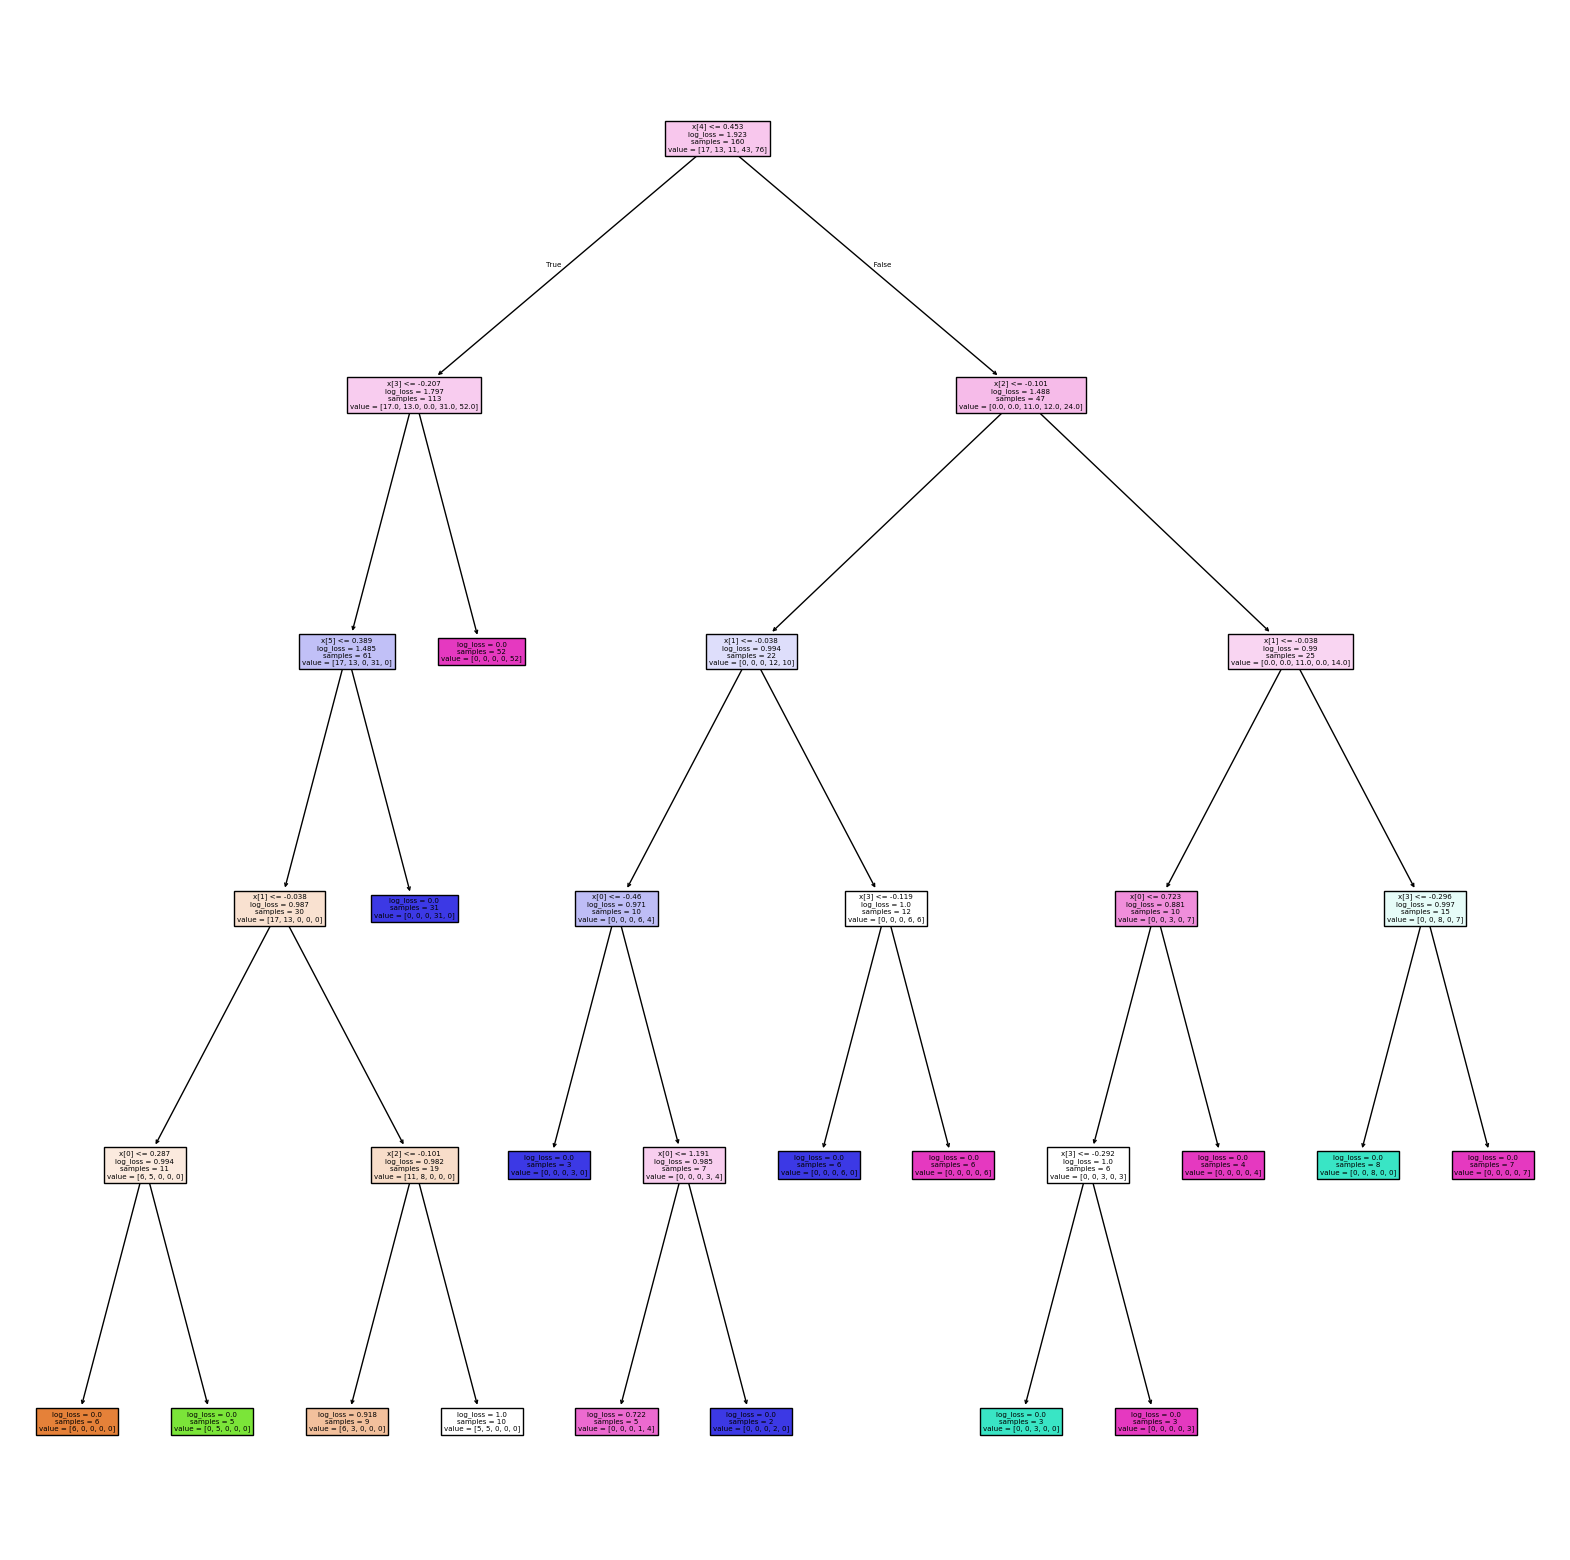

In [145]:
plt.figure(figsize=(20,20))
tree.plot_tree(grid.best_estimator_,filled=True)

In [146]:
y_pred=grid.predict(X_test)
y_pred

array(['drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugA', 'drugY', 'drugA', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [147]:
print("The accuracy score for decision tree classifier with pre pruning is ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

The accuracy score for decision tree classifier with pre pruning is  0.875
[[ 6  0  0  0  0]
 [ 2  1  0  0  0]
 [ 0  0  3  0  2]
 [ 0  0  0 10  1]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         6
       drugB       1.00      0.33      0.50         3
       drugC       1.00      0.60      0.75         5
       drugX       1.00      0.91      0.95        11
       drugY       0.83      1.00      0.91        15

    accuracy                           0.88        40
   macro avg       0.92      0.77      0.79        40
weighted avg       0.90      0.88      0.86        40



In [148]:
model=LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']  # Regularization methods
C_values = [100, 10, 1.0, 0.1, 0.01]  # Regularization strength
solver = ['liblinear', 'saga']  # Only solvers compatible with l1 and elasticnet
param_grid = {
    'penalty': penalty,
    'C': C_values,
    'solver': solver
}
param_grid


{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['liblinear', 'saga']}

In [149]:
gridcv=GridSearchCV(estimator=model,param_grid=param_grid,scoring='accuracy',cv=cv)
gridcv.fit(X_train,y_train)

c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionW

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [150]:
y_test=gridcv.predict(X_test)
y_pred

array(['drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugA', 'drugY', 'drugA', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [151]:
gridcv.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [152]:
print("The accuracy score for decision logistic regression with hyperparamter tuning is ",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

The accuracy score for decision logistic regression with hyperparamter tuning is  0.875
[[ 6  0  0  0  0]
 [ 2  1  0  0  0]
 [ 0  0  3  0  2]
 [ 0  0  0 10  1]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         6
       drugB       1.00      0.33      0.50         3
       drugC       1.00      0.60      0.75         5
       drugX       1.00      0.91      0.95        11
       drugY       0.83      1.00      0.91        15

    accuracy                           0.88        40
   macro avg       0.92      0.77      0.79        40
weighted avg       0.90      0.88      0.86        40



In [155]:
import pickle
with open('treeclassifier.pkl','wb') as file:
    pickle.dump(grid,file)
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)
